The molecule inserted looks like this:


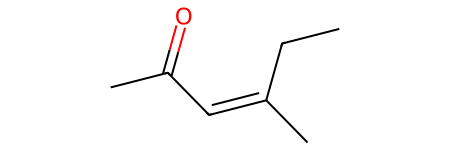

--------------------------------------
--------------------------------------
Disconnection specific to aldol reaction available
--------------------------------------
Option 1
Reactant 1


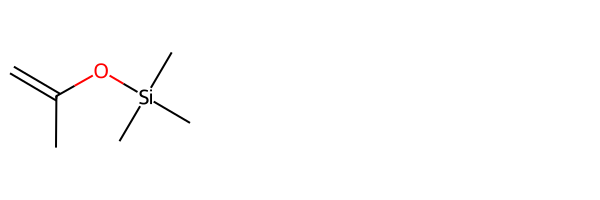

Reactant 1 could be obtained from the following reactants


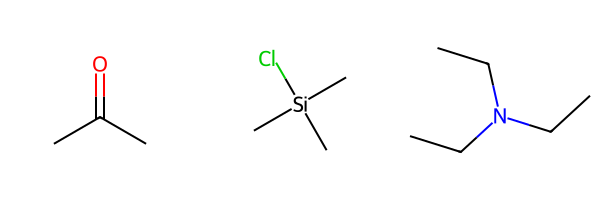

Reactant 2


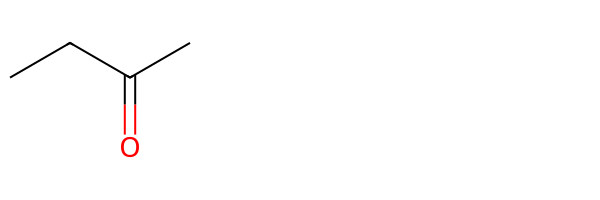

Catalyst


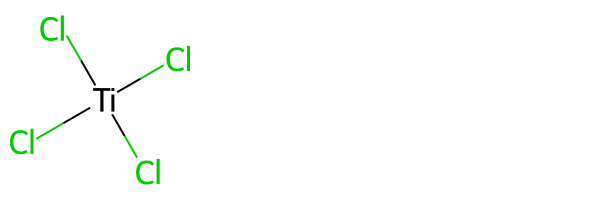

Once combined, the reactants give the following intermediate


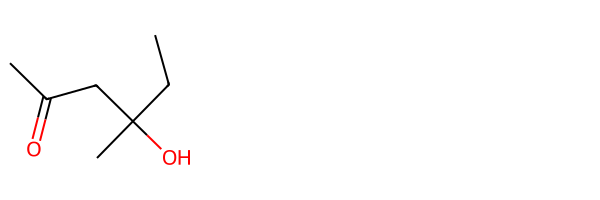

This intermediate needs to be dehydrated in acidic environment to give the target molecule
--------------------------------------
--------------------------------------


In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True

def unique_list_reactants (reactants_tuple: tuple) -> float:
    '''
    A tuple of tuples, containing the reactants (as Mol objects) needed to form the target molecule is received.
    This function returns a list of unique lists of the reactants (as Mol objects),
    accounting for the symmetry of the molecule.
    '''
    reactants_list = []
    for r in reactants_tuple:   #The tuple of tuples is transformed into a list of lists
        rxn_site = []           #of reactants (as String objects, using SMILES)
        for molecule in r:
            rxn_site.append(Chem.MolToSmiles(molecule))
        reactants_list.append(rxn_site)
    reactants_set = {tuple(r) for r in reactants_list} #The list is transformed in a set of tuples, to have unique elements
    reactants_list_unique = [list(r) for r in reactants_set] #The set of tuples is trnasformed into a list of unique lists
    reactants_unique_mol = []
    for r in reactants_list_unique: #Here, the list of unique list of reactants (as Mol objects) is created
        mols = []
        for smiles in r:
            mols.append(Chem.MolFromSmiles(smiles))
        reactants_unique_mol.append(mols)
    return reactants_unique_mol
    
def C_S_disconnection (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a C(sp3 hybridized)-S bond is present
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and a thiol in the presence of potassium carbonate are displayed and 1 is returned
    If the sulfur atom is bonded to two C(sp3 hybridized) atoms, 
    there are two possible disconnections for each S atom.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the bond is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][S]')): #Verifies if the C(sp3 hybridized)-S is present
        print (f"C(sp3)-S disconection available")
        print (f"--------------------------------------")
        iodine_smiles = 'I'
        potassium_carbonate_smiles ='C(=O)([O-])[O-].[K+].[K+]'
        iodine = Chem.MolFromSmiles(iodine_smiles)
        potassium_carbonate = Chem.MolFromSmiles(potassium_carbonate_smiles)
        rxn = AllChem.ReactionFromSmarts('[C^3:1][S:2].[I:3]>>[C:1][I:3].[S:2]') #Searches for the bond pattern and returns reactants
        reactants = unique_list_reactants(rxn.RunReactants((mol,iodine )))       #to make the bond in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form C(sp3 hybridized)-S bonds
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1], potassium_carbonate]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print(f"--------------------------------------")
        return 1
    return 0
    
def ester_disconnection (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if an ester functional group is present
    If yes, the reactants from which the ester could be formed: 
    an alcohol and a carboxylic acid in the presence of strong acid as catalyst are displayed and 1 is returned
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the ester is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2](=[O])[O][C]')): #Verifies if an ester is present 
        print (f"Ester disconnection available")
        print (f"--------------------------------------")
        proton_smiles = '[H+]'
        proton = Chem.MolFromSmiles(proton_smiles)
        hydroxyl_smile = 'O'
        hydroxyl = Chem.MolFromSmiles(hydroxyl_smile)
        rxn = AllChem.ReactionFromSmarts('[C^2:1](=[O:2])[O:3][C:4].[O:5]>>[C^2:1](=[O:2])[O:5].[O:3][C:4]') #Searches for the ester and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol, hydroxyl))) #reactants to make the ester in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #The reactants and the catalyst are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            catalyst = [proton]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Catalyst")
            display(Draw.MolsToGridImage(catalyst))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def alcohol_beta_double_bond (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a pattern alcohol beta olefin is present
    If yes, the reactants from which the pattern could be formed: 
    a terminal alkyne in the presence of a strong base and an expoxide are displayed.
    The intermediate product of the synthesis, and the hydrogenation condition to obtain
    the target molecule are also displayed.
    1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^2]=[C^2][CH2][C^3][OH]')): #Verifies if the pattern is present
        print (f"Primary alcohol with beta alkene disconnection available")
        print (f"--------------------------------------")
        amide_smiles = '[Na+].[NH2-]' #Starting from here, the SMILES of all the compounds needed are defined, and are
        amide = Chem.MolFromSmiles(amide_smiles) #trnasformed in mol objects.
        hydrogen_smiles = '[H][H]'
        hydrogen = Chem.MolFromSmiles(hydrogen_smiles)
        palladium = Chem.MolFromSmiles('[Pd]')
        calcium_carbonate = Chem.MolFromSmiles('[Ca+2].[O-]C([O-])=O ')
        lead = Chem.MolFromSmiles('[Pb]')
        sodium = Chem.MolFromSmiles('[Na]')
        ammonia = Chem.MolFromSmiles('N')
        t_butanol = Chem.MolFromSmiles('CC(C)(O)C')
        rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][CH2:3][C^3:4][OH:5]>>[C:1]#[C:2].[C:3]1[C:4][O:5]1') #Searches for the pattern and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,))) #reactants to make it in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0], amide]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print(f"Once this two are combined, the following product is obtained") #The reactants don't give directly the target molecule, so
            rxn_intermediate = AllChem.ReactionFromSmarts('[C:1]#[CH:2].[CH2:3]1[C:4][O:5]1>>[C:1]#[C:2][C:3][C:4][OH:5]') #the intermediate
            product_intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1]))) #product is found by reacting the reactants
            display(Draw.MolsToGridImage(product_intermediate[0])) #and is displayed
            print (f"The product needs to be hydrogenated in order to get to the target molecule") #Conditions to get target molecule
            print (f"If the Z geometry is needed for the double bond, then the following conditions, known as" 
            f" hydrogen on Lindlar catalyst, are employed")
            display(Draw.MolsToGridImage([hydrogen, palladium, calcium_carbonate, lead], molsPerRow=4 )) #If Z alkene needed
            print (f"If the E geometry is needed for the double bond, then the following conditions are employed")
            display(Draw.MolsToGridImage([sodium, ammonia, t_butanol])) #If E alkene needed
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def alcohol_beta_triple_bond (mol: Chem.rdchem.Mol) ->int:
    '''
    The function receives a mol object and verrifes if a pattern alcohol beta alkyne is present
    If yes, the reactants from which the pattern could be formed: 
    a terminal alkyne in the presence of a strong base and an expoxide are displayed and 1 is returned.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C]#[C][CH2][C^3][OH]')): #Verifies if the pattern is present
        print (f"Primary alcohol with beta alkyne disconnection available")
        print (f"--------------------------------------")
        amide_smiles = '[Na+].[NH2-]' #Starting from here, the SMILES of all the compounds needed are defined, and are
        amide = Chem.MolFromSmiles(amide_smiles) #trnasformed in mol objects.
        rxn = AllChem.ReactionFromSmarts('[C:1]#[C:2][CH2:3][C^3:4][OH:5]>>[C:1]#[C:2].[C:3]1[C:4][O:5]1') #Searches for the pattern and returns
        reactants = unique_list_reactants(rxn.RunReactants((mol,))) #reactants to make it in a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form esters
        for r in reactants: #Reactants are displayed
            print(f"Option {opt}")
            reactant_1 = [r[0], amide]
            reactant_2 = [r[1]]
            print(f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0

def alpha_monocarbonyl_alkylation (mol: Chem.rdchem.Mol):
    '''
    The function receives a mol object and verrifes all patterns 
    for a mono/disubstituted (C(sp3)-C(sp3)) ketone in the alpha position.
    If the pattern is found, the reactants from which the bond
    corresponding to the substitution: the ethyl acetoacetonate in the
    presence of sodium ethoxide and ethanol, and alkyl iodide, are displayed,
    together with the intermediate of the reaction.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    The reason for which all patterns need to be searched is:
    if the compound has in fact a 1,3 dicarbonyl pattern that is subtituted in common alpha
    carbon of the two dicarbonyls, another reaction is used for the substitution
    (the presence of the acetylacetate is no longer needed).
    Therefore, this function makes sure that a substituted ketone is present, but
    is not related to another ketone in a 1,3 relationship 
    '''
    iodine = Chem.MolFromSmiles('I')
    sodium_ethoxide = Chem.MolFromSmiles('[Na+].[O-]CC')
    ethanol = Chem.MolFromSmiles('CCO')
    ethyl_fumarate = Chem.MolFromSmiles('C(=O)OCC')
    match = 0 #Parameter that checks if at leas one of the patterns is found
    reactants = []
    '''
    reactants is a list (called let's say primary) of lists (secondary) of lists (tertiary);
    Each secondary list represents all reactive sites of one type (e.g all monocarbonyl sites that are
    monosubstituted both on the left side and right side)
    Each tertiary list represents a reactive site, and contains the reactants from which
    that site could be formed
    Now, all possible patterns for a mono/disubstituted monoketones are searched for.
    Always linking the ketone position 3 with a C(sp3) ensures that a 1,3 dicarbonyl
    is not spotted.
    '''
    #Pattern monosubstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH2^3][C](=[O])[CH2^3][C^3]')):
        rxn_1 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH2^3:2][C:3](=[O:4])[CH2^3:5][C^3:6].[C:7](=[O:8])[O:9][C:10][C:11].[I:12]>>[C^3:1][CH2^3:2][C:3](=[O:4])[C^3:5][C:7](=[O:8])[O:9][C:10][C:11].[C^3:6][I:12]')
        reactants_1 = unique_list_reactants(rxn_1.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_1)
        match = 1
    #Pattern disubstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH^3]([C^3])[C](=[O])[CH2^3][C^3]')):
        rxn_2 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[CH2^3:6][C^3:7].[C:8](=[O:9])[O:10][C:11][C:12].[I:13]>>[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[C^3:6][C:8](=[O:9])[O:10][C:11][C:12].[C^3:7][I:13]')
        reactants_2 = unique_list_reactants(rxn_2.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_2)
        match = 1
    #Pattern triubstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3]([C^3])([C^3])[C](=[O])[CH2^3][C^3]')):
        rxn_3 = AllChem.ReactionFromSmarts(
        '[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[CH2^3:7][C^3:8].[C:9](=[O:10])[O:11][C:12][C:13].[I:14]>>[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[C^3:7][C:9](=[O:10])[O:11][C:12][C:13].[C^3:8][I:14]')
        reactants_3 = unique_list_reactants(rxn_3.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_3)
        match = 1
    #Pattern nonbstituted (left) monosubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[CH2^3][C^3]')):
        rxn_4 = AllChem.ReactionFromSmarts(
        '[CH3^3:1][C:2](=[O:3])[CH2^3:4][C^3:5].[C:6](=[O:7])[O:8][C:9][C:10].[I:11]>>[CH3^3:1][C:2](=[O:3])[C^3:4][C:6](=[O:7])[O:8][C:9][C:10].[C:5][I:11]')
        reactants_4 = unique_list_reactants(rxn_4.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_4)
        match = 1
    #Pattern monosubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH2^3][C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_5 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH2^3:2][C:3](=[O:4])[CH^3:5]([C^3:6])[C^3:7].[C:8](=[O:9])[O:10][C:11][C:12].[I:13]>>[C^3:1][CH2^3:2][C:3](=[O:4])[C^3:5]([C^3:6])[C:8](=[O:9])[O:10][C:11][C:12].[C^3:7][I:13]')
        reactants_5 = unique_list_reactants(rxn_5.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_5)
        match = 1
    #Pattern disubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH^3]([C])[C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_6 = AllChem.ReactionFromSmarts(
        '[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[CH^3:6]([C^3:7])[C^3:8].[C:9](=[O:10])[O:11][C:12][C:13].[I:14]>>[C^3:1][CH^3:2]([C^3:3])[C:4](=[O:5])[C^3:6]([C^3:7])[C:9](=[O:10])[O:11][C:12][C:13].[C^3:8][I:14]')
        reactants_6 = unique_list_reactants(rxn_6.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_6)
        match = 1
    #Pattern trisubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3]([C^3])([C^3])[C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_7 = AllChem.ReactionFromSmarts(
        '[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[CH^3:7]([C^3:8])[C^3:9].[C:10](=[O:11])[O:12][C:13][C:14].[I:15]>>[C^3:1][C^3:2]([C^3:3])([C^3:4])[C:5](=[O:6])[C^3:7]([C^3:8])[C:10](=[O:11])[O:12][C:13][C:14].[C^3:9][I:15]')
        reactants_7 = unique_list_reactants(rxn_7.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_7)
        match = 1
    #Pattern nonsubstituted (left) disubstituted (right) ketone
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[CH^3]([C^3])[C^3]')):
        rxn_8 = AllChem.ReactionFromSmarts(
        '[CH3^3:1][C:2](=[O:3])[CH^3:4]([C^3:5])[C^3:6].[C:7](=[O:8])[O:9][C:10][C:11].[I:12]>>[CH3^3:1][C:2](=[O:3])[C^3:4]([C^3:5])[C:7](=[O:8])[O:9][C:10][C:11].[C:6][I:12]')
        reactants_8 = unique_list_reactants(rxn_8.RunReactants((mol,ethyl_fumarate,iodine)))
        reactants.append(reactants_8)
        match = 1
    if match == 1:
         print (f"C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (mono/disubstituted)")
         print (f"--------------------------------------")   
    opt = 1 #Parameter to count the number of possible reactants that form the trisubstituted monocarbonyl
    for r in reactants: #Reactants, and also intermediate for the synthesis are displayed
        for reactant in r:
            print (f"Option {opt}")
            reactant_1 = [reactant[0], sodium_ethoxide, ethanol]
            reactant_2 = [reactant[1]]
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"Once the two reactants are combined, the following product is obtained")
            rxn_intermediate = AllChem.ReactionFromSmarts('[C:1][C:2][O:3][C:4](=[O:5])[C:6].[I:7][C:8]>>[C:1][C:2][O:3][C:4](=[O:5])[C:6][C:8].[I:7]')
            product_intermediate = unique_list_reactants(rxn_intermediate.RunReactants((reactant[0],reactant[1])))
            display(Draw.MolsToGridImage([product_intermediate[0][0]]))
            print (f"This product needs to be hydrolyzed using NaOH, then quenched using an acid, and finally heated"
                   f" in order to obtain the target molecule")
            print (f"--------------------------------------")
        print (f"--------------------------------------")

def alpha_monocarbonyl_alkylation_trisubstituted (mol: Chem.rdchem.Mol):
    '''
    The function receives a mol object and verrifes if the alpha carbon 
    of a ketone is trisubstituted
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and the non-substituted ketone,
    in the presence of triethyl amine are displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    '''
    triethyl_amine = Chem.MolFromSmiles('CCN(CC)CC')
    iodine = Chem.MolFromSmiles('I')
    #The pattern desired is searched
    if (
        mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH2^3][C](=[O])[C^3]([C^3])([C^3])[C^3]'))
        or mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][CH^3]([C])[C](=[O])[C^3]([C^3])([C^3])[C^3]'))
        or mol.HasSubstructMatch(Chem.MolFromSmarts('[C^3][C^3]([C^3])([C^3])[C](=[O])[C^3]([C^3])([C^3])[C^3]'))
        or mol.HasSubstructMatch(Chem.MolFromSmarts('[CH3^3][C](=[O])[C^3]([C^3])([C^3])[C^3]'))):
            print (f"C(sp3)-C(sp3) bond dissociation available in alpha position of carbonyl compound (trisubstituted)")
            print (f"--------------------------------------")
            rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C:3]([C^3:4])([C^3:5])[C^3:6].[I:7]>>[C:1](=[O:2])[C:3]([C^3:4])[C^3:6].[C:5][I:7]') #Searches for
            reactants = unique_list_reactants(rxn.RunReactants((mol,iodine))) #the desired pattern and returns reactants as a list of lists; each list = reactive site
            opt = 1 #Parameter to count the number of possible reactants that form the trisubstituted monocarbonyl
            for r in reactants: #Reactants are displayed
                print (f"Option {opt}")
                reactant_1 = [r[0], triethyl_amine]
                reactant_2 = [r[1]]
                opt += 1
                print (f"Reactant 1")
                display(Draw.MolsToGridImage(reactant_1))
                print (f"Reactant 2")
                display(Draw.MolsToGridImage(reactant_2))
                print (f"--------------------------------------")
            print (f"--------------------------------------")

def alpha_dicarbonyl_alkylation (mol: Chem.rdchem.Mol):
    '''
    The function receives a mol object and verrifes if the alpha carbon 
    of a 1,3-dicarbonyl compound is substituted
    If yes, the reactants from which the bond could be formed: 
    an alkyl iodide and the non-substituted 1,3-dicarbonyl compound,
    in the presence of sodium ethoxide and ethanol are displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f" Invalid type {type(mol)}: 'mol'"
            f" Should be passed as a mol object."
        )
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3]([C^3])[C]=[O]')):
        iodine = Chem.MolFromSmiles('I')
        sodium_ethoxide = Chem.MolFromSmiles('[Na+].[O-]CC')
        ethanol = Chem.MolFromSmiles('CCO')
        ethyl_fumarate = Chem.MolFromSmiles('C(=O)OCC')
        print (f"C(sp3)-C(sp3) bond disconnection available in alpha position of 1,3-dicarbonyl compound")
        print (f"--------------------------------------")
        rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])[C^3:3]([C^3:4])[C:5]=[O:6].[I:7]>>[C:1](=[O:2])[C:3][C:5]=[O:6].[C:4][I:7]') #Searches for
        reactants = unique_list_reactants(rxn.RunReactants((mol,iodine))) #the desired pattern and returns reactants as a list of lists; each list = reactive site
        opt = 1 #Parameter to count the number of possible reactants that form the substituted 1,3 dicarbonyl
        for r in reactants: #Reactants are displayed
            print (f"Option {opt}")
            reactant_1 = [r[0], sodium_ethoxide, ethanol]
            reactant_2 = [r[1]]
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")

def alpha_carbonyl_alkylation (mol: Chem.rdchem.Mol) ->int:
    '''
    This function receives a mol object and checks is the pattern
    ketone substituted in the alpha position is present. If so,
    the reactants from which the pattern could be formed are 
    presented and 1 is returned.
    The function uses different reactions to form mono/di-substituted
    ketones, trisubstituted ketones and mono/disubstituted 1,3 dicarbonyl
    compounds
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    '''
    It is checked if the compound contains the pattern of carbonyl with alpha substituted carbon.
    If so, the functions corresponding to each type of disconnection of carbonyl with alpha substituted
    carbon are performed
    '''
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3][C]')):
        alpha_dicarbonyl_alkylation(mol)
        alpha_monocarbonyl_alkylation(mol)
        alpha_monocarbonyl_alkylation_trisubstituted(mol)
        return 1
    return 0

def dicarbonyl_1_3 (mol: Chem.rdchem.Mol) ->int:
     '''
    This function receives a mol object and checks is the pattern
    1,3 dicarbonyl compound is present. If so,
    the reactants from which the pattern could be formed: an enamine
    and an acyl chloride are presented and 1 is returned.
    Also, the starting materials to form the enamine: a carbonyl and
    piperidine are displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
     if not isinstance (mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
     if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C^3][C]=[O]')): #Checks if the 1,3 dicarbonyl pattern is present
         chlorine = Chem.MolFromSmiles('Cl')
         oxygen = Chem.MolFromSmiles('O')
         piperidine = Chem.MolFromSmiles('C1CCNCC1')
         print (f"1,3 dicarbonyl disconnection available")
         print (f"--------------------------------------")
         #Searches for the desired pattern and returns the reactants to make it as a lists of lists; each list = reactive site
         rxn = AllChem.ReactionFromSmarts(
             '[C:1](=[O:2])[C^3:3][C:4]=[O:5].[Cl:6].[C^3:8]1[C^3:9][C^3:10][N^3:11][C^3:12][C^3:13]1>>[C:1]([N^3:11]1[C^3:12][C^3:13][C^3:8][C^3:9][C^3:10]1)=[C:3].[Cl:6][C:4]=[O:5].[O:2]')
         reactants = unique_list_reactants(rxn.RunReactants((mol, chlorine, piperidine)))
         opt = 1 #Parameter to count the number of possible reactants that form the 1,3 dicarbonyl 
         for r in reactants:
             print (f"Option {opt}")
             reactant_1 = [r[0]]
             reactant_2 = [r[1]]
             print (f"Reactant 1")
             display(Draw.MolsToGridImage(reactant_1))
             print(f"Reactant 1 could be obtained from the following reactants")
             #The enamine is disconnected into a carbonyl compound and piperidine, which are also displayed
             rxn_1 = AllChem.ReactionFromSmarts(
                 '[C:1]([N:2]1[C^3:3][C^3:4][C^3:5][C^3:6][C^3:7]1)=[C:8].[O:9]>>[C:1](=[O:9])[C:8].[C^3:7]1[N^3:2][C^3:3][C^3:4][C^3:5][C^3:6]1')
             list_reactants_for_reactant_1 = unique_list_reactants(rxn_1.RunReactants((r[0],oxygen)))
             reactants_for_reactant_1 = [list_reactants_for_reactant_1[0][0], list_reactants_for_reactant_1[0][1]]
             display(Draw.MolsToGridImage(reactants_for_reactant_1))
             print (f"Reactant 2")
             display(Draw.MolsToGridImage(reactant_2))
             print (f"Once combined, the reactants give the following intermediate")
             #The reaction intermediate is formed and is displayed afterwards
             rxn_intermediate = AllChem.ReactionFromSmarts(
                 '[C:1]([N:11]1[C^3:12][C^3:13][C^3:8][C^3:9][C^3:10]1)=[C:3].[Cl:6][C:4]=[O:5]>>[C:1]([N^3:11]1[C^3:12][C^3:13][C^3:8][C^3:9][C^3:10]1)=[C:3][C:4]=[O:5].[Cl:6]')
             intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1])))
             display(Draw.MolsToGridImage([intermediate[0][0]]))
             print (f"This intermediate needs to be hydrolyzed in mild acidic environment to give the target molecule")
             opt += 1
             print (f"--------------------------------------")
         print (f"--------------------------------------")
         return 1
     return 0

def aldol (mol: Chem.rdchem.Mol) ->int:
    '''
    This function receives a mol object and checks is a cabonyl
    compound followed by a double bond is present. If so,
    the reactants from which the pattern could be formed: a silyl ether
    and a carbonyl compound, with TiCl4 as catalyst are displayed together
    with the rxn intermediate and 1 is returned.
    The starting materials to form the silyl ether: a carbonyl in the presence
    of Et3N and TMSCl are also displayed.
    If the molecule has a certain symmetry, the number of disconnections is reduced.
    If the pattern is not present, the function returns 0.
    '''
    
    if not isinstance(mol, Chem.rdchem.Mol):
        raise TypeError(
            f"Invalid type :{type(mol)}: 'mol'"
            f"Should be passed as a mol object."
        )
    
    if mol.HasSubstructMatch(Chem.MolFromSmarts('[C](=[O])[C]=[C]')): #Verrifies if the compound contains the desired pattern
        tmscl = Chem.MolFromSmiles('C[Si](C)(C)Cl')
        triethyl_amine = Chem.MolFromSmiles('CCN(CC)(CC)')
        oxygen = Chem.MolFromSmiles('O')
        chlorine = Chem.MolFromSmiles('Cl')
        catalyst = Chem.MolFromSmiles('[Ti](Cl)(Cl)(Cl)(Cl)')
        print (f"Disconnection specific to aldol reaction available")
        print (f"--------------------------------------")
        #The double bond from the pattern is disconnected and the reactants are returned as a list of lists; each list = reactive site
        rxn = AllChem.ReactionFromSmarts(
            '[C:1](=[O:2])[C:3]=[C:4].[C:5][Si:6]([C:7])([C:8])[Cl:9].[O:10]>>[C:1]([O:2][Si:6]([C:5])([C:7])([C:8]))=[C:3].[O:10]=[C:4].[Cl:9]')
        reactants = unique_list_reactants(rxn.RunReactants((mol, tmscl, oxygen)))
        opt = 1 #Parameter to count the number of possible reactants that form the desired pattern
        for r in reactants: #Reactants and catalyst are displayed
            print (f"Option {opt}")
            reactant_1 = [r[0]]
            reactant_2 = [r[1]]
            print (f"Reactant 1")
            display(Draw.MolsToGridImage(reactant_1))
            print(f"Reactant 1 could be obtained from the following reactants")
            #The double bond is disconnected into TMSCl and a carbonyl compound in the presence of Et3N, which are also displayed
            rxn_1 = AllChem.ReactionFromSmarts(
                '[Si:1]([C:2])([C:3])([C:4])[O:5][C:6]=[C:7].[Cl:8]>>[C:6](=[O:5])[C:7].[Cl:8][Si:1]([C:2])([C:3])[C:4]')
            list_reactants_for_reactant_1 = unique_list_reactants(rxn_1.RunReactants((r[0],chlorine)))
            reactants_for_reactant_1 = [list_reactants_for_reactant_1[0][0], list_reactants_for_reactant_1[0][1], triethyl_amine]
            display(Draw.MolsToGridImage(reactants_for_reactant_1))
            print (f"Reactant 2")
            display(Draw.MolsToGridImage(reactant_2))
            print (f"Catalyst")
            display(Draw.MolsToGridImage([catalyst]))
            print (f"Once combined, the reactants give the following intermediate")
            #Reaction intermediate is formed and displayed
            rxn_intermediate = AllChem.ReactionFromSmarts(
                '[Si:1]([C:2])([C:3])([C:4])[O:5][C:6]=[C:7].[O:8]=[C:9]>>[O:5]=[C:6][C:7][C:9][O:8].[Si:1]([C:2])([C:3])([C:4])')
            intermediate = unique_list_reactants(rxn_intermediate.RunReactants((r[0],r[1])))
            display(Draw.MolsToGridImage([intermediate[0][0]]))
            print (f"This intermediate needs to be dehydrated in acidic environment to give the target molecule")
            opt += 1
            print (f"--------------------------------------")
        print (f"--------------------------------------")
        return 1
    return 0
            
def disconnections (mol_smiles: str):
    '''
    This function takes the SMILE of a molecule and
    displays all the known disconnections.
    '''
    mol = Chem.MolFromSmiles(mol_smiles) #Transforms SMILE in mol object
    print (f"The molecule inserted looks like this:")
    display(mol)
    print (f"--------------------------------------")
    print (f"--------------------------------------")
    sum = 0 #Parameter that keeps track of the number of the types of disconnections found in the molecule
    known_disc = [C_S_disconnection, ester_disconnection, alcohol_beta_double_bond, alcohol_beta_triple_bond,
                 alpha_carbonyl_alkylation, dicarbonyl_1_3, aldol]
    for disc in known_disc:
        sum += disc(mol)
    if not sum: #In case no disconnection was found
        print(f"The molecule contains no known disconnections")

def main ():
    mol_smiles = 'CC(=O)C=C(C)CC'
    disconnections (mol_smiles)

if __name__ == '__main__':
    main()